<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1Bb44nmvjN7fZwrRYMOA7fOSvfCTZaNI0" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# **Clasificación multiclase**

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
import tensorflow as tf

# Cargar el conjunto de datos Fashion-MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
#(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Redimensionar las imágenes: de 28x28 a 784 (28x28) elementos en un único array
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)

# Normalizar los valores de los píxeles en el rango [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


2024-08-19 19:08:32.340709: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-19 19:08:32.349514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 19:08:32.359523: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 19:08:32.362557: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-19 19:08:32.370021: I tensorflow/core/platform/cpu_feature_guar

## Regresión logística

In [3]:
from sklearn.linear_model import LogisticRegression
# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=10000, verbose=1)  # Aumenta max_iter si el algoritmo no converge
model.fit(train_images, train_labels)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7850     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  6.37317D-02


 This problem is unconstrained.



At iterate   50    f=  2.62748D-01    |proj g|=  2.53451D-03

At iterate  100    f=  2.42867D-01    |proj g|=  1.37334D-03

At iterate  150    f=  2.36453D-01    |proj g|=  2.64106D-04

At iterate  200    f=  2.33904D-01    |proj g|=  1.91109D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7850    237    253      1     0     0   9.630D-05   2.331D-01
  F =  0.23308723212041321     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


LogisticRegression(max_iter=10000, verbose=1)

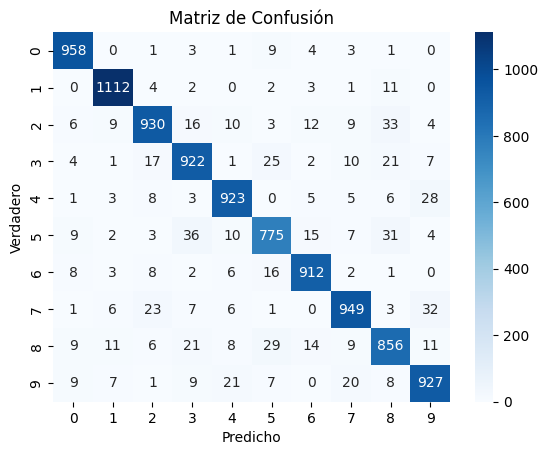

Métricas Principales:

Precisión del modelo: 0.9264

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [4]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))

## Árboles de decisión

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(train_images, train_labels)


DecisionTreeClassifier(random_state=42)

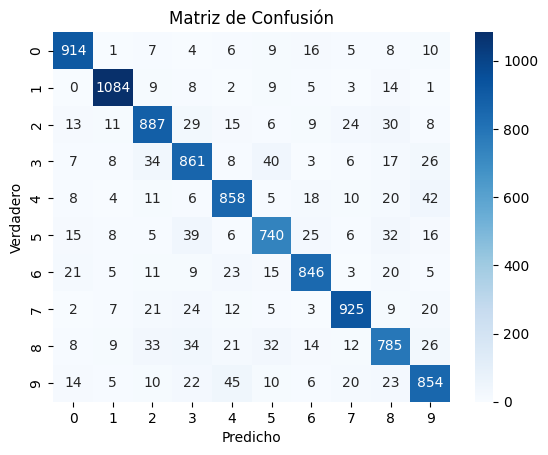

Métricas Principales:

Precisión del modelo: 0.8754

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.85      0.83      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



In [6]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))

## Random Forests

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_images, train_labels)


RandomForestClassifier(random_state=42)

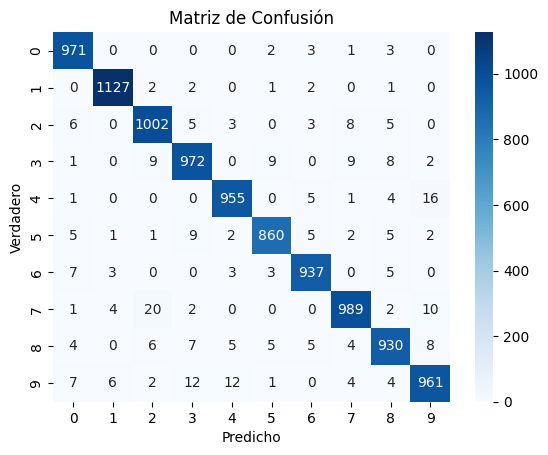

Métricas Principales:

Precisión del modelo: 0.9704

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [8]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))

## XGBoost

In [10]:
!pip -q install xgboost

from xgboost import XGBClassifier

# Crear y entrenar el modelo de árbol de decisión
model = XGBClassifier(random_state=42)
model.fit(train_images, train_labels)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

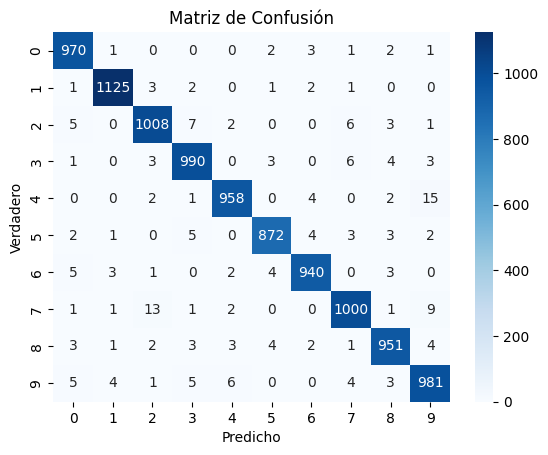

Métricas Principales:

Precisión del modelo: 0.9795

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [11]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))

## SVM

### One vs All

In [12]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Crear un clasificador SVM
svm_clf = SVC()

# Crear un clasificador OvA utilizando el clasificador SVM
ova_clf = OneVsRestClassifier(svm_clf)

# Entrenar el clasificador OvA en el conjunto de entrenamiento
ova_clf.fit(train_images, train_labels);


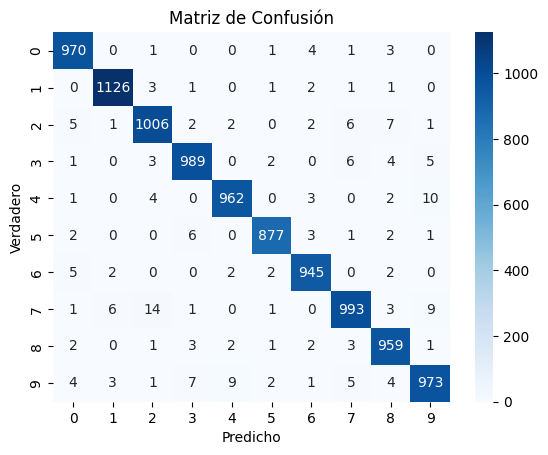

Métricas Principales:

Precisión del modelo: 0.9800

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [13]:
# Hacer predicciones en el conjunto de prueba
y_pred = ova_clf.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))

### One vs One

In [14]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Crear un clasificador SVM
svm_clf = SVC()

# Crear un clasificador OvO utilizando el clasificador SVM
ovo_clf = OneVsOneClassifier(svm_clf)

# Entrenar el clasificador OvO en el conjunto de entrenamiento
ovo_clf.fit(train_images, train_labels)


OneVsOneClassifier(estimator=SVC())

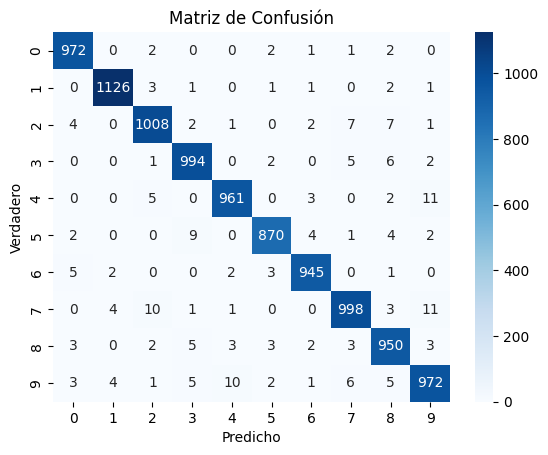

Métricas Principales:

Precisión del modelo: 0.9796

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [15]:
# Hacer predicciones en el conjunto de prueba
y_pred = ovo_clf.predict(test_images)

# Calcular la matriz de confusión
conf_mat = confusion_matrix(test_labels, y_pred)

# Dibujar la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar las métricas principales
print("Métricas Principales:\n")
print(f"Precisión del modelo: {accuracy_score(test_labels, y_pred):.4f}\n")
print(classification_report(test_labels, y_pred))